# Basic Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [11]:
!unzip -qq ratings.zip

replace __MACOSX/._ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
ratings1 = pd.read_csv('ratings.csv')
ratings_small = pd.read_csv('ratings_small.csv')
movies_metadata = pd.read_csv('movies_metadata.csv')
ratings1

<ipython-input-12-fa797d2a9b85>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movies_metadata.csv')


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [13]:
ratings = [ratings1, ratings_small]
ratings = pd.concat(ratings)

In [14]:
movies_metadata[['id', 'title']]

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II
...,...,...
45461,439050,Subdue
45462,111109,Century of Birthing
45463,67758,Betrayal
45464,227506,Satan Triumphant


In [15]:
n_ratings = len(ratings['rating'])
n_movies = len(ratings['movieId'].unique())
n_users = len(ratings['userId'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 26124293
Number of unique movieId's: 45123
Number of unique users: 270896
Average number of ratings per user: 96.44
Average number of ratings per movie: 578.96


In [16]:
titles = dict(zip(movies_metadata['id'], movies_metadata['title']))
titles_inv = dict(zip(movies_metadata['title'], movies_metadata['id']))

In [17]:
user_freq = ratings[['userId', 'movieId']].groupby('userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
user_freq

,userId,n_ratings
0,1,47
1,2,98
2,3,61
3,4,266
4,5,126
...,...,...
270891,270892,75
270892,270893,190
270893,270894,148
270894,270895,20


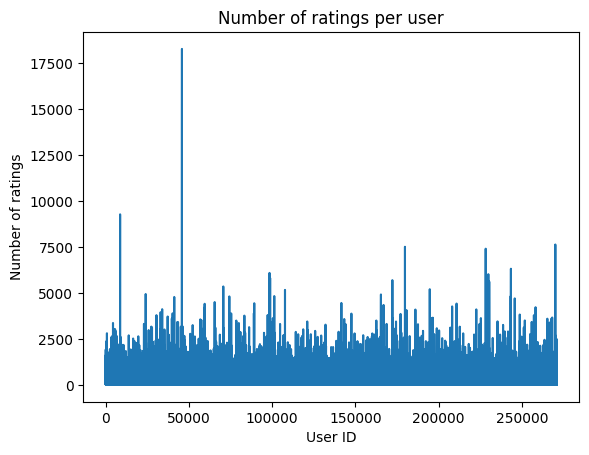

In [18]:
plt.plot(user_freq.userId, user_freq.n_ratings)
plt.xlabel('User ID')
plt.ylabel('Number of ratings')
plt.title('Number of ratings per user')
plt.show()

In [19]:
movie_freq = ratings[['movieId', 'userId']].groupby('movieId').count().reset_index()
movie_freq.columns = ['movieId', 'n_ratings']
movie_freq

,movieId,n_ratings
0,1,66255
1,2,26167
2,3,15556
3,4,2994
4,5,15314
...,...,...
45118,176267,1
45119,176269,1
45120,176271,1
45121,176273,1


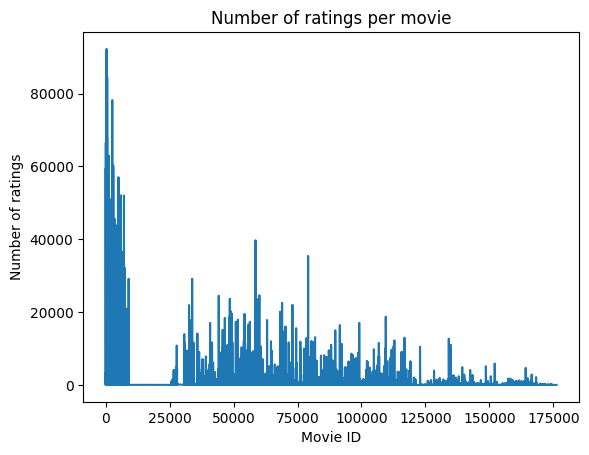

In [20]:
plt.plot(movie_freq.movieId, movie_freq.n_ratings)
plt.xlabel('Movie ID')
plt.ylabel('Number of ratings')
plt.title('Number of ratings per movie')
plt.show()

In [23]:
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean']).reset_index()
movie_stats.columns = ['movieId', 'count', 'rating']

In [24]:
movie_stats

,movieId,count,rating
0,1,66255,3.888099
1,2,26167,3.237628
2,3,15556,3.175495
3,4,2994,2.873580
4,5,15314,3.080253
...,...,...,...
45118,176267,1,4.000000
45119,176269,1,3.500000
45120,176271,1,5.000000
45121,176273,1,1.000000


In [25]:
movies_metadata.rename(columns = {'id' : 'movieId'} , inplace = True)

In [26]:
convertDict = {'movieId':str}
movie_stats = movie_stats.astype(convertDict)

Merging Movie Stats with the Movies database on the basis of Movie ID

In [27]:
movie_stats = movie_stats.merge(movies_metadata[['movieId', 'title']], on = 'movieId')

Lowest Rating Movies:

In [28]:
movie_stats[movie_stats.rating.min() == movie_stats.rating]

,movieId,count,rating,title
5643,97915,1,0.5,Point of Order!
6301,122930,1,0.5,Breathless
6309,123320,1,0.5,Canned Dreams
6325,124111,1,0.5,Jett Jackson: The Movie
6341,124619,1,0.5,Lotto Land
6343,124625,1,0.5,My Mother's Courage
6462,128177,2,0.5,Elisa Before the End of the World
6469,128241,1,0.5,The Rise
6616,133941,2,0.5,Double Face
6948,148408,1,0.5,The Crush


In [29]:
movie_stats[movie_stats.rating.max() == movie_stats.rating]

,movieId,count,rating,title
3369,27396,1,5.0,Brannigan
5583,95977,1,5.0,The Man Behind The Gun
5864,105526,1,5.0,Any Day Now
6506,129530,1,5.0,Brutal
6532,130544,1,5.0,Palermo or Wolfsburg
6587,132912,1,5.0,The Price of Sex
6712,137853,1,5.0,Journey to Planet X
6922,146946,1,5.0,Yellow Rock
7217,160329,1,5.0,Lightheaded
7292,164278,1,5.0,Harvey


# User Item Matrix

In [30]:
from scipy.sparse import csr_matrix

def create_matrix(df):

    N = len(df['userId'].unique())
    M = len(df['movieId'].unique())

    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))

    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))

    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))

    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(ratings)

# KNN Model

In [31]:
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
    neighbour_ids = []

    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

# Prediction

In [32]:
movie_name = input("Enter the name of a movie you've recently watched: ")
movie_id = int(titles_inv[movie_name])
similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = titles[str(movie_id)]

print(f"Since you watched {movie_title}, you may like:-")
for i in similar_ids:
  if(str(i) in titles.keys()):
    print(titles[str(i)])
  else:
    continue

Enter the name of a movie you've recently watched: Star Wars
Since you watched Star Wars, you may like:-
Aliens vs Predator: Requiem
Psycho
Night on Earth
Titanic
Big Fish
Romeo + Juliet
Reservoir Dogs
The Endless Summer
